#  <u> 1st step : Load

We import the different librairies that we are going to use :

    - pandas : Pandas is a library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical arrays and time series.
    
    - Matplotlib is a Python programming language library for plotting and visualizing data as graphs.

In [40]:
# we import the useful librairies 
import pandas as pd
import matplotlib.pyplot as plt

We open the final merged table of the 'normalization part ' with the columns upper value and lower value

In [233]:
# we open and read the merge table of all indicators
bronze_dataset = pd.read_csv ('./data/bronze_dataset_with_outliers.csv')
bronze_dataset = bronze_dataset.drop(bronze_dataset.columns[0], axis = 1)
bronze_dataset

,Code,Year,Indicator,Real value,Lower value,Upper value
0,AFG,1966,Deaths,1.616590e+05,3.980225e+04,2.280962e+05
1,AFG,1967,Deaths,1.625790e+05,3.980225e+04,2.280962e+05
2,AFG,1968,Deaths,1.635730e+05,3.980225e+04,2.280962e+05
3,AFG,1969,Deaths,1.646380e+05,3.980225e+04,2.280962e+05
4,AFG,1970,Deaths,1.654300e+05,3.980225e+04,2.280962e+05
...,...,...,...,...,...,...
66489,OWID_GFR,1986,GDP,7.110545e+11,-5.467304e+11,9.798115e+11
66490,OWID_GFR,1987,GDP,7.913833e+11,-5.467304e+11,9.798115e+11
66491,OWID_GFR,1988,GDP,7.847509e+11,-5.467304e+11,9.798115e+11
66492,OWID_GFR,1989,GDP,8.517760e+11,-5.467304e+11,9.798115e+11



# <u> 2nd STEP : Remove outliers 

We need to find outliers and remove them 
To do that, we take our renamed final table, and with loc , we keep only specific datas
    
Indeed the ' ~ ' means 'not' and the folowing condition is'values out of range' it means when 'the real value is not between the lower value and the upper value '
    
So at the end we will just have the values not out of range, so we will remove outliers with this command  

In [234]:
without_outliers=bronze_dataset.loc[~((bronze_dataset['Real value']<bronze_dataset['Lower value']) | (bronze_dataset['Real value']>bronze_dataset['Upper value']))]
without_outliers

,Code,Year,Indicator,Real value,Lower value,Upper value
0,AFG,1966,Deaths,1.616590e+05,3.980225e+04,2.280962e+05
1,AFG,1967,Deaths,1.625790e+05,3.980225e+04,2.280962e+05
2,AFG,1968,Deaths,1.635730e+05,3.980225e+04,2.280962e+05
3,AFG,1969,Deaths,1.646380e+05,3.980225e+04,2.280962e+05
4,AFG,1970,Deaths,1.654300e+05,3.980225e+04,2.280962e+05
...,...,...,...,...,...,...
66488,OWID_GFR,1985,GDP,5.686651e+11,-5.467304e+11,9.798115e+11
66489,OWID_GFR,1986,GDP,7.110545e+11,-5.467304e+11,9.798115e+11
66490,OWID_GFR,1987,GDP,7.913833e+11,-5.467304e+11,9.798115e+11
66491,OWID_GFR,1988,GDP,7.847509e+11,-5.467304e+11,9.798115e+11


Then we delete the upper and lower values colums to reduce our final table 

In [235]:
table_clean =without_outliers.drop(['Lower value','Upper value'],axis=1)
table_clean

,Code,Year,Indicator,Real value
0,AFG,1966,Deaths,1.616590e+05
1,AFG,1967,Deaths,1.625790e+05
2,AFG,1968,Deaths,1.635730e+05
3,AFG,1969,Deaths,1.646380e+05
4,AFG,1970,Deaths,1.654300e+05
...,...,...,...,...
66488,OWID_GFR,1985,GDP,5.686651e+11
66489,OWID_GFR,1986,GDP,7.110545e+11
66490,OWID_GFR,1987,GDP,7.913833e+11
66491,OWID_GFR,1988,GDP,7.847509e+11


# <u> 3rd  STEP : Silver 

Now, we are going to put each indicators in a column and to index the dataset 

In [236]:
silver_dataset1=table_clean.set_index(["Code", "Year"]).pivot(columns="Indicator", values="Real value").reset_index()
silver_dataset=silver_dataset1.rename(columns={0: 'index'})
silver_dataset

Indicator,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
0,ABW,1950,NaN,NaN,NaN,NaN,57.2,NaN
1,ABW,1951,NaN,NaN,NaN,NaN,57.7,NaN
2,ABW,1952,NaN,NaN,NaN,NaN,58.7,NaN
3,ABW,1953,NaN,NaN,NaN,NaN,59.5,NaN
4,ABW,1954,NaN,NaN,NaN,NaN,60.4,NaN
...,...,...,...,...,...,...,...,...
21097,ZWE,2017,26069.0,3.7064,NaN,0.532,60.7,NaN
21098,ZWE,2018,24648.0,3.6591,NaN,0.535,61.4,NaN
21099,ZWE,2019,24006.0,3.5994,NaN,0.533,61.3,NaN
21100,ZWE,2020,23533.0,3.5451,NaN,0.533,61.1,NaN


Then we convert this new table without outliers into a csv document

In [237]:
silver_dataset.to_csv('./data/SilverDataset.csv')

# <u> 4th  STEP : Visual explanations  

The goal in this part is to understand how the process of removing outliers works.  
First, we display the dataframe with outliers values to see which country had ouliers values for an indicator.

In [238]:
with_outlier=bronze_dataset.loc[((bronze_dataset['Real value']<bronze_dataset['Lower value']) | (bronze_dataset['Real value']>bronze_dataset['Upper value']))]
with_outlier.head(10)

,Code,Year,Indicator,Real value,Lower value,Upper value
159,AFG,2009,GDP,8.015607e+09,-2.693621e+09,6.044926e+09
160,AFG,2010,GDP,1.031396e+10,-2.693621e+09,6.044926e+09
161,AFG,2011,GDP,1.119100e+10,-2.693621e+09,6.044926e+09
162,AFG,2012,GDP,1.300060e+10,-2.693621e+09,6.044926e+09
163,AFG,2013,GDP,1.282286e+10,-2.693621e+09,6.044926e+09
164,AFG,2014,GDP,1.218510e+10,-2.693621e+09,6.044926e+09
216,AFG,2007,Fertility,6.530300e+00,6.647813e+00,8.072512e+00
217,AFG,2008,Fertility,6.376200e+00,6.647813e+00,8.072512e+00
218,AFG,2009,Fertility,6.235400e+00,6.647813e+00,8.072512e+00
219,AFG,2010,Fertility,6.098700e+00,6.647813e+00,8.072512e+00


We can see that for instance , Afghanistan had outliers values for the fertility indicator.
That's why we are going to use this country and this indicator to see what happened during the removing outliers process.

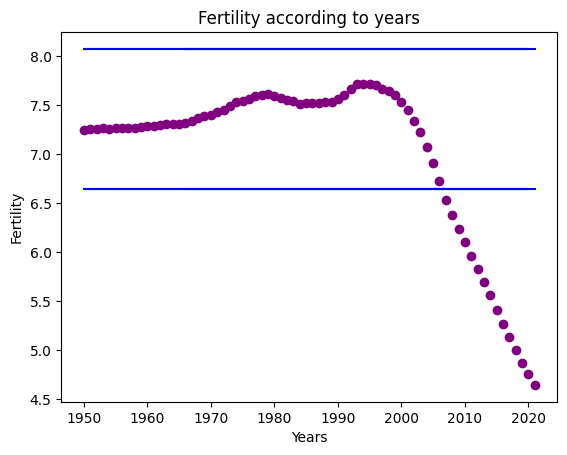

In [239]:
# We first reduce the dataset before removing outliers to keep only one country et one indicator
bronze_dataset = bronze_dataset[bronze_dataset.Code == 'AFG']
bronze_dataset = bronze_dataset[bronze_dataset.Indicator == 'Fertility']

# we plot the two limits 
plt.plot(bronze_dataset['Year'], bronze_dataset['Lower value'], color='blue')
plt.plot(bronze_dataset['Year'], bronze_dataset['Upper value'], color='blue')

#we plot the values of fertility for each year for Afghanistan with outliers
plt.scatter(bronze_dataset['Year'], bronze_dataset['Real value'], color='purple')

# we define the title and the labels of the axis 
plt.title('Fertility according to years')
plt.xlabel('Years')
plt.ylabel('Fertility')

plt.show()

So we can see that few values are outside the two limits, that's why we have removed them during the process of cleaning and removing outliers

Now we can plot the same graph but with the values from the dataset without ouliers to see that we have well removed the values outside the limits 

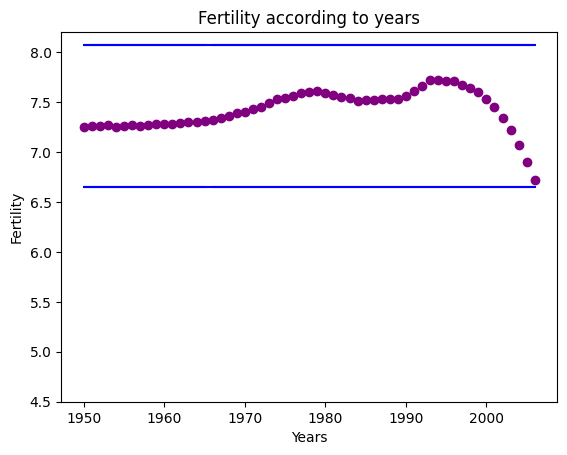

In [248]:
# We first reduce the dataset without outliers to keep only one country et one indicator
without_outliers = without_outliers[without_outliers.Code == 'AFG']
without_outliers = without_outliers[without_outliers.Indicator == 'Fertility']

# we plot the two limits 
plt.plot(without_outliers['Year'], without_outliers['Lower value'], color='blue')
plt.plot(without_outliers['Year'], without_outliers['Upper value'], color='blue')

#we plot the values of fertility for each year for Afghanistan without outliers
plt.scatter(without_outliers['Year'], without_outliers['Real value'], color='purple')

# we define the title and the labels of the axis 
plt.title('Fertility according to years')
plt.xlabel('Years')
plt.ylabel('Fertility')

plt.gca().set_ylim(4.5, 8.2)

plt.show()

On this graph, we can see that now there is only datas between the lower limit and the upper limits.
We have removed all the outliers !